In [29]:
import sys,os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('./bin')
import PolA_A_allpars
import matplotlib as mpl

mpl.rcParams['font.size']=12
from multiplesites_eqbinding_polcycle import avb_1sites, avb_2sites, avb_3sites, avb_3sites_nologsumexp,avb_4sites, avb_5sites, avb_6sites, foldchange_from_avbinding_ratesdirectly_Hill

instance=PolA_A_allpars.GRFCalculations_100_100_15()
othervars=np.array([0])

In [30]:
def fmultiple(a,pars_noKx):
    #a is the equilibrium average binding, can be used for 1 or multiple sites
    #for more flexibility in which rates to affect, use foldchange_from_avbinding_ratesdirectly_Hill
    k1,k20,k30,k4,s2,n2,k2sat,s3,n3,k3sat=pars_noKx
    Hill2=(a**n2)/(s2**n2+a**n2)
    k2=k20+(k2sat-k20)*Hill2
    Hill3=(a**n3)/(s3**n3+a**n3)
    k3=k30+(k3sat-k30)*Hill3
    m=k3*(k1*k2)/(k2*k3+k3*k4+k1*k3+k1*k2)
    return [m, a, k2, k3]

def plot_parset(pars,title=None,ax=None,color="k",figname=None,xrange=None,xticks=None):
    Arange=np.logspace(xrange[0],xrange[1],100)
    instance.fill_num_den(pars,othervars)
    m0=instance.interfaceGRF(0)
    print(m0)
    out=np.zeros(len(Arange))
    for a,A in enumerate(Arange):
        #m=PolAB_A_allpars.interface_GRF_PolAB_A_A(pars.copy(),np.array([0]),A)
        m=instance.interfaceGRF(A)
        out[a]=m/m0
    #ax=plt.subplots(1,1,figsize=(6,4))
    if ax is None:
        fig,ax=plt.subplots(1,1,figsize=(1.8,1.5))
        show=True
    else:
        show=False
    ax.plot(Arange,out,color=color)
    ax.set_xscale("log")
    ax.set_xlabel(r"$x$",size=10)
    #if k==0:
    ax.set_ylabel('F(x)',size=10)
    ax.axhline(y=1,linestyle="--",color="gray")
    ax.spines[['right', 'top']].set_visible(False)

    if xticks:
        ax.set_xticks(xticks)
        ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
    if title is not None:
         ax.set_title(title)
    if figname is not None:
        plt.tight_layout()
        plt.savefig(figname,bbox_inches="tight")
    if show:
        plt.tight_layout()
        plt.show()
        return 
    else:
        return ax
    
def plot_parset_ku(pars_,title=None,ax=None,color="k",A=1,figname=None,bTrange=None,xticks=None):
    kuvals=np.logspace(bTrange[0],bTrange[1],100)
    out=[]
    for b, ku in enumerate(kuvals):
        binding=[kb,ku]*6

        parslist=pars_+binding
        pars=np.array(parslist)
        instance.fill_num_den(pars,othervars)
        m0=instance.interfaceGRF(0)
        mA=instance.interfaceGRF(A)
        out.append(mA/m0)
    
    if ax is None:
        fig,ax=plt.subplots(1,1,figsize=(1.8,1.5))
        show=True
    else:
        show=False
    ax.plot(kuvals,out,color=color)
    ax.set_xscale("log")
    ax.set_xlabel(r"$b_T$",size=10)
    #if k==0:
    ax.set_ylabel('F(x)',size=10)
    ax.axhline(y=1,linestyle="--",color="gray")
    ax.spines[['right', 'top']].set_visible(False)

    if xticks:
        ax.set_xticks(xticks)
        ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
    if title is not None:
         ax.set_title(title)
    if figname is not None:
        plt.tight_layout()
        plt.savefig(figname,bbox_inches="tight")
    if show:
        plt.tight_layout()
        plt.show()
        return 
    else:
        return ax

In [31]:
figsfolder="./figscode"

In [32]:
10**(0.5)

3.1622776601683795

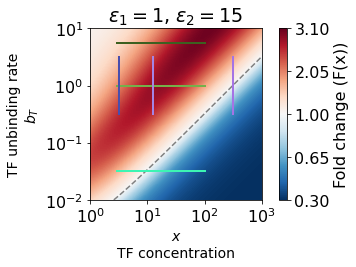

ku=5.62341
0.0016


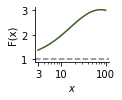

ku=1
0.0016


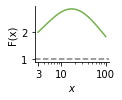

ku=0.0316228
0.0016


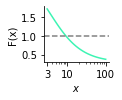

x=3.16228


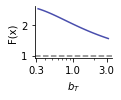

x=12.5893


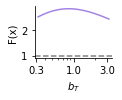

x=316.228


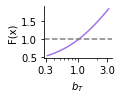

In [12]:
#Fig 3C
mpl.rcParams["font.size"]=16
ktni0=0.01 #k1
ktin0=1 #k4
ktia0=0.2 #k2
ktan0=0.05 #k3


ktinA=ktin0
ktniA=ktni0
ktiaA=ktia0*15
ktanA=ktan0*0.01
kb=0.1
xvals=np.logspace(0,3,200)
kuvals=np.logspace(-2,1,200)
out=np.zeros((len(kuvals), len(xvals)))

#bxlist=[np.log10(7),np.log10(1),np.log10(0.03)] #line at each of these three unbinding rates, as a function of concentration
kulist=[10**0.75,1,10**(-1.5)] #line at each of these three unbinding rates, as a function of concentration
xlist=[1,2,2.9] #line at each of these three concentrations, as a function of unbinding rates

xlplot=[np.log10(3),np.log10(100)]
xticks_conc=[3,10,100]
bTlplot=[-0.5,0.5]
xticks_bT=[np.round(10**bTlplot[0],1),1,np.round(10**bTlplot[1])]
xlist=[0.5,1.1,2.5]
colors_bx=["#3d6020ff","#75b04aff","#3df4b3ff"]
#colors_x=["#870007ff","#ff7116ff","#ffb116ff"]
colors_x=["#494eadff","#a484e5ff","#a474e5ff"]

for b, ku in enumerate(kuvals):
    binding=[kb,ku]*6

    parslist=[ktia0,ktan0,ktin0,ktni0,ktiaA,ktanA,ktinA,ktniA]+binding
    pars=np.array(parslist)
    instance.fill_num_den(pars,othervars)
    m0=instance.interfaceGRF(0)
    #print(m0)
    
    for x_,x in enumerate(xvals):
        #m=PolAB_A_allpars.interface_GRF_PolAB_A_A(pars.copy(),np.array([0]),A)
        m=instance.interfaceGRF(x)
        out[b,x_]=m/m0



for fignum in range(1):
    fig,ax=plt.subplots(1,1,figsize=(6,4)) 
    #ar=np.ma.masked_array(out,mask=out<1)
    min_val_rounded=np.round(out.min(),1) #round minimum value to 1 decimal
    max_val_rounded=np.round(out.max(),1) #round max value to 1 decimal
    if out.min()<1:
        norm=mpl.colors.TwoSlopeNorm(vmin=min_val_rounded, vcenter=1., vmax=max_val_rounded)
        cmap=plt.cm.RdBu_r
    else:
        norm=None
        cmap=plt.cm.Blues
    extent=[np.log10(xvals[0]),np.log10(xvals[-1]),np.log10(kuvals[0]),np.log10(kuvals[-1])]
    im=ax.imshow(out,origin="lower",norm=norm,cmap=cmap,extent=extent)
    ax.contour(out,extent=extent,levels=[1],linestyles=["--"],colors=["gray"])
    ax.set_xticks([0,1,2,3])
    ax.set_xticklabels([r"$10^0$",r"$10^1$",r"$10^2$",r"$10^3$"])
    ax.set_yticks([-2,-1,0,1])
    ax.set_yticklabels([r"$10^{-2}$",r"$10^{-1}$",r"$10^0$",r"$10^1$"])
    if fignum<0:
        kulist_=[kulist[0],kulist[-1]]
    else:
        kulist_=kulist
    for k_,ku in enumerate(kulist_):
    #    print(bG)
        ax.plot(xlplot,[np.log10(ku),np.log10(ku)],linestyle="-",color=colors_bx[k_],linewidth=2)
    #if fignum>1:
    for x_,x in enumerate(xlist):
            ax.plot([x,x],bTlplot,linestyle="-",color=colors_x[x_],linewidth=2)
    #ax.plot([1,1],[-1,1],linestyle=":",color="k")
        #ax.axhline(y=np.log10(bG),)
    #ax.set_xscale('log')
    ax.set_ylabel("TF unbinding rate\n"+r"$b_T$",size=14)
    ax.set_xlabel(r"$x$"+"\nTF concentration",size=14)
    ax.set_title(r"$\epsilon_1=%g$, $\epsilon_2=%g$"%(ktniA/ktni0, ktiaA/ktia0))
    
    below_one=np.linspace(min_val_rounded,1,3)
    above_one=np.linspace(1,max_val_rounded,3)
    bounds=np.concatenate((below_one,above_one[1:]))
    plt.colorbar(im,ax=ax,ticks=bounds,label="Fold change (F(x))")
    #ax.axhline(y=1,linestyle="--",color="gray")
    #if title is not None:
    #    ax.set_title(title)
    plt.tight_layout()
    plt.savefig(os.path.join(figsfolder,"Fig4colormap_r_%d.svg"%fignum))
    plt.show()
    mpl.rcParams["font.size"]=10
    fignames=["Fig4C_d.svg","Fig4C_m.svg","Fig4C_u.svg"]
    for b,ku in enumerate(kulist):
        print("ku=%g"%ku)
        binding=[kb,ku]*6

        parslist=[ktia0,ktan0,ktin0,ktni0,ktiaA,ktanA,ktinA,ktniA]+binding
        pars=np.array(parslist)
        plot_parset(pars,title=None,color=colors_bx[b],figname=os.path.join(figsfolder,fignames[b]),xrange=xlplot,xticks=xticks_conc) #os.path.join(figsfolder,fignames[b]))

    fignames=["Fig4Cku_d.svg","Fig4Cku_m.svg","Fig4Cku_u.svg"]
    for x_,x in enumerate(xlist):
        print("x=%g"%(10**x))
        parslist=[ktia0,ktan0,ktin0,ktni0,ktiaA,ktanA,ktinA,ktniA]
        plot_parset_ku(parslist,title=None,color=colors_x[x_],A=10**x,bTrange=bTlplot,figname=os.path.join(figsfolder,fignames[x_]),xticks=xticks_bT) #os.path.join(figsfolder,fignames[x_]))


In [148]:
ktni0, ktin0, ktia0, ktan0

(0.01, 1, 0.2, 0.05)

In [144]:
0.01/10, 0.1/0.01

(0.001, 10.0)

In [83]:
0.07/10, 0.07/0.01

(0.007000000000000001, 7.000000000000001)

20.0
0.6529680053294998 2.1422546428481106
0.65 2.14


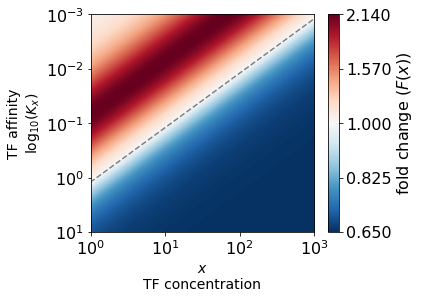

K vs sites heatmap at x=2
0.19101279352832592 2.1422533189012385
0.19 2.14


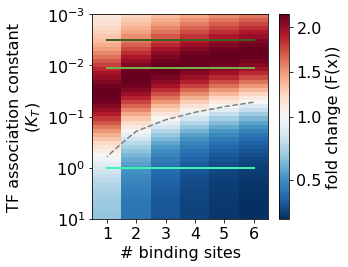

$K_T=0.00$
$K_T=0.01$
$K_T=1.00$


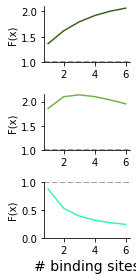

0.14050654223255588 1.2986670278989925
0.14 1.3


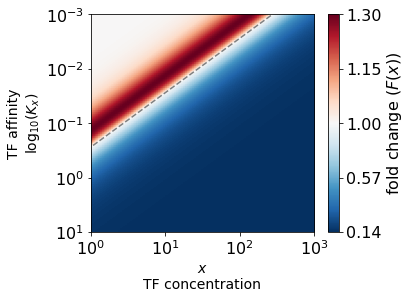

K vs sites heatmap at x=2
0.07391490538658314 1.2985513410723826
0.07 1.3


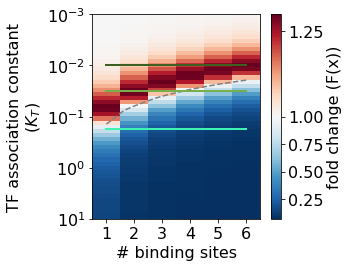

$K_T=0.01$
$K_T=0.03$
$K_T=0.18$


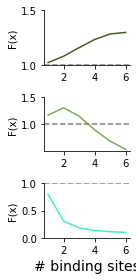

In [33]:
#Fig 3D
#define parameter set

#k1=0.1
#k4=0.75



#k20=0.2 #0.2
#k2sat=k20*50
#print(k2sat)
#s2=1


#k30=0.01
#k3sat=k30*0.01
#s3=1

k1=0.05
k4=1.

k20=0.2
k2sat=k20*100
print(k2sat)
s2=1

k30=0.05
k3sat=k30*0.01
s3=0.1




cmap=plt.cm.RdBu_r
xvals=np.logspace(0,3,100)
Kxvals=np.logspace(-3,1,100) #1000 nM KD to 1 nM KD
functions=[avb_1sites, avb_2sites, avb_3sites, avb_4sites, avb_5sites, avb_6sites]

Klevels1=[0.,-1.95,-2.5]
Klevels2=[-0.75,-1.5,-2]
Klevelslist=[Klevels1,Klevels2]
#colors_K=["olive","green","lime"]
colors_K=["#3d6020ff","#75b04aff","#3df4b3ff"][::-1]

log_x=np.log(2)
for n in [1,2]: #h in the paper, hill coefficient
    Klevels=Klevelslist[n-1]
    pars=[k1,k20,k30,k4,s2,n,k2sat,s3,n,k3sat]

    m0=fmultiple(0,pars)[0] #basal expression, TF concentration=0 so average binding = 0


    #K vs concentration heatmap for single site
    
    out=np.zeros((len(Kxvals), len(xvals)))
    for b, Kx in enumerate(Kxvals):
        for x_,xval in enumerate(xvals):
            avb=avb_1sites([np.log(Kx)],np.log(xval))
            #print(Kx, xval, avb)
            m=fmultiple(avb,pars)[0]
            out[b,x_]=m/m0
    min_val_rounded=np.round(out.min(),2) #round minimum value to 2 decimal
    max_val_rounded=np.round(out.max(),2) #round max value to 2 decimals
    print(out.min(),out.max())
    print(min_val_rounded, max_val_rounded)
    mpl.rcParams["font.size"]=16
    fig,ax=plt.subplots(1,1,figsize=(5,4)) 
    norm=mpl.colors.TwoSlopeNorm(vmin=min_val_rounded, vcenter=1., vmax=max_val_rounded)
    extent=[np.log10(xvals[0]),np.log10(xvals[-1]),np.log10(Kxvals[-1]),np.log10(Kxvals[0])]

    im=ax.imshow(out,origin="upper",norm=norm,cmap=cmap,extent=extent,aspect="auto")
    ax.contour(out,origin="upper",extent=extent,levels=[1],linestyles=["--"],colors=["gray"])
    ax.set_xticks([0,1,2,3])
    ax.set_xticklabels([r"$10^0$",r"$10^1$",r"$10^2$",r"$10^3$"])
    ax.set_yticks([-3,-2,-1,0,1])
    ax.set_yticklabels([r"$10^{-3}$",r"$10^{-2}$",r"$10^{-1}$",r"$10^0$",r"$10^1$"])

    ax.set_ylabel("TF affinity\n"+r"log$_{10}$($K_x$)",size=14)
    ax.set_xlabel(r"$x$"+"\nTF concentration",size=14)


    #colorbar bounds: below and above 1 different spacing but uniformly distributed ticks
    below_one=np.linspace(min_val_rounded,1,3)
    above_one=np.linspace(1,max_val_rounded,3)
    bounds=np.concatenate((below_one,above_one[1:]))
    cbax=plt.colorbar(im,ax=ax,ticks=bounds)
    cbax.set_label(label="fold change ($F(x)$)")

    #ax.axhline(y=1,linestyle="--",color="gray")
    #if title is not None:
    #    ax.set_title(title)
    #plt.tight_layout()
    plt.savefig(os.path.join("./figscode/","Fig4Kxcolormap_n=%d.svg"%n),bbox_inches="tight")
    plt.show()
    
    print("K vs sites heatmap at x=%g"%np.exp(log_x))
    #K vs #of sites heatmap
    out=np.zeros((len(Kxvals[::2]), 6))
    for v,K in enumerate(Kxvals[::2]):
        for i in range(6):
            function=functions[i]
            Ks=[np.log(K)]*(i+1) #all sites have the same affinity
            avb=function(Ks,log_x)
            #print(avb)        
            m=fmultiple(avb,pars)[0]
            fc=m/m0
            out[v,i]=fc
    #print(out)
    fig,ax=plt.subplots(1,1,figsize=(5,4)) 
    min_val_rounded=np.round(out.min(),2) #round minimum value to 2 decimal
    max_val_rounded=np.round(out.max(),2) #round max value to 2 decimals
    print(out.min(),out.max())
    print(min_val_rounded, max_val_rounded)
    if out.min()<1:
        norm=mpl.colors.TwoSlopeNorm(vmin=min_val_rounded, vcenter=1., vmax=max_val_rounded)
        cmap=plt.cm.RdBu_r
    else:
        norm=None
        cmap=plt.cm.Blues
    extent=[0.5,6.5,np.log10(Kxvals[-1]),np.log10(Kxvals[0])]
    im=ax.imshow(out,origin="upper",norm=norm,cmap=cmap,extent=extent,interpolation=None,aspect="auto")
    ax.contour(out,origin="upper",extent=extent,levels=[1],linestyles=["--"],colors=["gray"])
    
    for k in range(3):
        Klevel=Klevels[k]
        ax.plot([1.,6],[Klevel,Klevel],linestyle="-",color=colors_K[k],linewidth=2)
    #ax.plot([np.log10(x),np.log10(x)],[1,3],linestyle="-",color=colors_x[x_],linewidth=2)
    #ax.plot([1,1],[-1,1],linestyle=":",color="k")
        #ax.axhline(y=np.log10(bG),)
    #ax.set_xscale('log')
    ax.set_xticks(np.arange(1,7))
    ax.set_xticklabels(np.arange(1,7))
    ax.set_xlim(0.5,6.5)
    ax.set_yticks([-3,-2,-1,0,1])
    ax.set_yticklabels([r"$10^{-3}$",r"$10^{-2}$",r"$10^{-1}$",r"$10^0$",r"$10^1$"])
    ax.set_ylabel("TF association constant\n"+r"($K_T$)")
    ax.set_xlabel(r"# binding sites")
    #ax.set_title(r"$\epsilon_1=%g$, $\epsilon_2=%g$"%(ktniA/ktni0, ktiaA/ktia0))

    plt.colorbar(im,label="fold change (F(x))",ax=ax)
    #ax.axhline(y=1,linestyle="--",color="gray")
    #if title is not None:
    #    ax.set_title(title)
    plt.tight_layout()
    plt.savefig(os.path.join("./figscode/","Fig4Kxsitenum_n=%d.svg"%n),bbox_inches="tight")
    plt.show()

    mpl.rcParams["font.size"]=10


    fig,axes=plt.subplots(3,1,figsize=(2,4))
    for k in range(3)[::-1]:
        K=10**Klevels[k]
        color=colors_K[k]
        out=np.zeros(6)
        for i in range(6):
            function=functions[i]
            Ks=[np.log(K)]*(i+1)
            avb=function(Ks,log_x)
            out[i]=fmultiple(avb,pars)[0]/m0
        ax=axes[2-k]
        ax.plot(np.arange(1,7),out,color=color)
        ax.set_xticks([2,4,6])
        if n==1:
            yticks=[[0.,0.5,1],[1.0,1.5,2.0],[1.0,1.5,2.0]][k]
        else:
            yticks=[[0.,0.5,1],[1.0,1.5],[1.0,1.5]][k]
        ax.set_yticks(yticks)
        #ax.set_xscale("log")
        if k==0:
            ax.set_xlabel("# binding sites",size=14)
        ax.axhline(y=1,linestyle="--",color="gray")
        title="$K_T=%2.2f$"%K
        print(title)
        #ax.set_title(title)
        ax.set_ylabel("F(x)")
        ax.spines[['right', 'top']].set_visible(False)

    plt.tight_layout()
    plt.savefig(os.path.join("./figscode/","Fig4_linesKxsitenum_n=%d.svg"%n),bbox_inches="tight")
    plt.show()
